In [1]:
import numpy as np
import pandas as pd

In [2]:
jeopardy = pd.read_csv("JEOPARDY_CSV.csv")

In [3]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
print(jeopardy.columns.values)

['Show Number' ' Air Date' ' Round' ' Category' ' Value' ' Question'
 ' Answer']


In [5]:
# print(jeopardy.keys)

In [6]:
answer_column = jeopardy.loc[:, " Answer"]

In [7]:
print(jeopardy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
Show Number    216930 non-null int64
 Air Date      216930 non-null object
 Round         216930 non-null object
 Category      216930 non-null object
 Value         216930 non-null object
 Question      216930 non-null object
 Answer        216928 non-null object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB
None


In [8]:
# print(answer_column)

In [9]:
answer_counts = answer_column.value_counts()

In [10]:
# print(answer_counts)

In [11]:
jeopardy[" Value"].replace(to_replace="None", value=0, inplace=True)
# print(jeopardy[" Value"])

In [12]:
jeopardy[" Value"] = jeopardy[" Value"].apply(lambda x: str(x))
jeopardy[" Value"] = jeopardy[" Value"].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
# print(dict(jeopardy[" Value"].value_counts()))
jeopardy['count'] = jeopardy.groupby(' Value')[' Value'].transform(pd.Series.value_counts)
# print(dict(jeopardy[" Value"].value_counts())[jeopardy[" Value"]])

In [13]:
print(jeopardy.head())
jeopardy = jeopardy[jeopardy['count'] > 1000]
print(jeopardy.head(20))

   Show Number    Air Date      Round                         Category  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   

    Value                                           Question      Answer  \
0     200  For the last 8 years of his life, Galileo was ...  Copernicus   
1     200  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe   
2     200  The city of Yuma in this state has a record av...     Arizona   
3     200  In 1963, live on "The Art Linkletter Show", th...  McDonald's   
4     200  Signer of the Dec. of Indep., framer of the Co...  John Adams   

   count  
0  30455  
1  30455  
2  30455  
3  30455  
4  30455  
    Show Number    Air Date     

In [14]:
unique_categories = jeopardy[" Category"].unique()
print(unique_categories)

['HISTORY' "ESPN's TOP 10 ALL-TIME ATHLETES" 'EVERYBODY TALKS ABOUT IT...'
 ... 'OFF-BROADWAY' 'RIDDLE ME THIS' 'AUTHORS IN THEIR YOUTH']


In [15]:
unique_series = pd.DataFrame({"Category": unique_categories})

In [16]:
print(unique_series)

                               Category
0                               HISTORY
1       ESPN's TOP 10 ALL-TIME ATHLETES
2           EVERYBODY TALKS ABOUT IT...
3                      THE COMPANY LINE
4                   EPITAPHS & TRIBUTES
5                        3-LETTER WORDS
6            DR. SEUSS AT THE MULTIPLEX
7          PRESIDENTIAL STATES OF BIRTH
8                        AIRLINE TRAVEL
9                THAT OLD-TIME RELIGION
10                       MUSICAL TRAINS
11                          "X"s & "O"s
12                     THE SOLAR SYSTEM
13                        GEOGRAPHY "E"
14                         RADIO DISNEY
15                       PARTS OF PEACH
16               BE FRUITFUL & MULTIPLY
17                         LET'S BOUNCE
18                    RHYMES WITH SMART
19                        SCIENCE CLASS
20                       KIDS IN SPORTS
21                       JUST THE FACTS
22                            SEE & SAY
23                           NEWS TO ME


In [17]:
category_column = jeopardy[" Category"]
category_counts = category_column.value_counts()
print(category_counts)

BEFORE & AFTER                    540
SCIENCE                           500
LITERATURE                        486
AMERICAN HISTORY                  410
POTPOURRI                         401
WORLD HISTORY                     365
WORD ORIGINS                      361
COLLEGES & UNIVERSITIES           343
HISTORY                           342
SPORTS                            339
U.S. CITIES                       332
WORLD GEOGRAPHY                   324
ANIMALS                           323
BODIES OF WATER                   321
STATE CAPITALS                    307
BUSINESS & INDUSTRY               306
ISLANDS                           292
U.S. GEOGRAPHY                    290
WORLD CAPITALS                    287
RELIGION                          286
OPERA                             281
SHAKESPEARE                       281
TELEVISION                        279
RHYME TIME                        276
PEOPLE                            276
TRANSPORTATION                    275
BALLET      

In [18]:
# print(category_counts["BEFORE & AFTER"])
cat_counts_dict = category_counts.to_dict()
# print(cat_counts_dict.items())
cat_counts_list = list(cat_counts_dict.items())
results = cat_counts_list[0:50]
print(results)

[('GIRLS IN SONG', 11), ('LINGUISTICS', 5), ('NEW ORLEANS & KATRINA', 5), ('QUICK LIT', 10), ('LIGHTS, CAMERA, ACTION MOVIE', 5), ('AUCTION PACKED', 5), ('TASTY AD SLOGANS', 5), ('THE TENTH INNING', 5), ("MOTHER NATURE'S STRANGE IDEAS", 5), ('PIE-POURRI', 5), ('THE FILM THAT ALMOST WAS', 5), ('LAST', 5), ('"EU" FIRST', 5), ('NATIVE AMERICAN TRIBES', 20), ('COLORFUL RHYME TIME', 30), ('WHEN PUSHKIN COMES TO SHOVE', 4), ('PRESIDENT GEORGE W. BUSH', 5), ('1909: 100 YEARS AGO', 5), ('AT WIDE RECEIVER FOR THIS TEAM...', 5), ('FAMOUS COMEDY TEAMS', 5), ('1997 FILMS', 1), ('GOOD BOOKS', 5), ('GEOGRAPHY IN LITERATURE', 1), ('WINNIE', 4), ('GOOD BAD GUYS ON TV', 5), ('CANADIAN FLAGS', 4), ('RACE-Y HUMOR', 3), ('SINGING THE BLUES', 4), ('JOHANNES BRAHMS', 5), ('ASSETS', 5), ('ANIMALS, VEGETABLES, MINERALS', 4), ('4-LETTER COUNTRIES', 5), ('U.S. TRANSPORTATION', 1), ('TECHIES', 5), ('FIRST & LAST', 5), ('THE SISTINE CHAPEL', 5), ('LIKE A HURRICANE', 4), ('SIX FEET UNDER', 4), ('SPORTS STATUES', 4

## Bag Of Words Prediction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

count_vect = CountVectorizer()
X = jeopardy[" Question"]
y = jeopardy[" Value"]
# y = y.replace('None', 0, inplace=True)
# y = y.apply(lambda x: str(x))
# y = y.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
# y = pd.Series(y).where(lambda x : x.count())
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(170047, 81788)

In [21]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(170047, 81788)

In [22]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [24]:
predicted = text_clf.predict(X_test)

In [25]:
print(accuracy_score(y_test, predicted))

0.19763831388784342


Accuracy for the bag of words with Naive Bayes is only 19% accurate which is worse than random guessing.

In [26]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', alpha=1e-3, n_iter=5))])
text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted = text_clf_svm.predict(X_test)
print(accuracy_score(y_test, predicted))

/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.14026627775686865


If we try to use support vector machine, we actually get even worse prediction results.

In [27]:
parameters = {'vect_ngram_range': [(1,1), (1,2)],
             'tfidf_use_idf': (True, False),
             "clf_alpha": (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, param_grid=parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x10875d2b0, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/Rache...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x10875d2b0, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/Rache...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 5
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 5), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 5)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=5)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 5, 5, 3, 59, 12, 298251, tzinfo=tzutc()), u'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', u'msg_type': u'execute_request', u'session': u'8aca5899f3264f9c8f3a578c528bc0ad', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['8aca5899f3264f9c8f3a578c528bc0ad']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 5, 5, 3, 59, 12, 298251, tzinfo=tzutc()), u'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', u'msg_type': u'execute_request', u'session': u'8aca5899f3264f9c8f3a578c528bc0ad', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['8aca5899f3264f9c8f3a578c528bc0ad'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2018, 5, 5, 3, 59, 12, 298251, tzinfo=tzutc()), u'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', u'msg_type': u'execute_request', u'session': u'8aca5899f3264f9c8f3a578c528bc0ad', u'username': u'username', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'c0a4a80ccd84446c83f406a3d85db503', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'parameters = {\'vect_ngram_range\': [(1,1), (1..._jobs=-1)\ngs_clf = gs_clf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2713                 self.displayhook.exec_result = result
   2714 
   2715                 # Execute the user code
   2716                 interactivity = "none" if silent else self.ast_node_interactivity
   2717                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2718                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2719                 
   2720                 self.last_execution_succeeded = not has_raised
   2721 
   2722                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-27-5cd0c2dcf71b>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 10cdccd50, execution_..._before_exec=None error_in_exec=None result=None>)
   2817 
   2818         try:
   2819             for i, node in enumerate(to_run_exec):
   2820                 mod = ast.Module([node])
   2821                 code = compiler(mod, cell_name, "exec")
-> 2822                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10d33c5b0, file "<ipython-input-27-5cd0c2dcf71b>", line 5>
        result = <ExecutionResult object at 10cdccd50, execution_..._before_exec=None error_in_exec=None result=None>
   2823                     return True
   2824 
   2825             for i, node in enumerate(to_run_interactive):
   2826                 mod = ast.Interactive([node])

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10d33c5b0, file "<ipython-input-27-5cd0c2dcf71b>", line 5>, result=<ExecutionResult object at 10cdccd50, execution_..._before_exec=None error_in_exec=None result=None>)
   2877         outflag = 1  # happens in more places, so it's easier as default
   2878         try:
   2879             try:
   2880                 self.hooks.pre_run_code_hook()
   2881                 #rprint('Running code', repr(code_obj)) # dbg
-> 2882                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10d33c5b0, file "<ipython-input-27-5cd0c2dcf71b>", line 5>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u'import numpy as np\nimport pandas as pd', u'jeopardy = pd.read_csv("JEOPARDY_CSV.csv")', u'jeopardy.head()', u'print(jeopardy.columns.values)', u'# print(jeopardy.keys)', u'answer_column = jeopardy.loc[:, " Answer"]', u'print(jeopardy.info())', u'# print(answer_column)', u'answer_counts = answer_column.value_counts()', u'# print(answer_counts)', u'jeopardy[" Value"].replace(to_replace="None", value=0, inplace=True)\n# print(jeopardy[" Value"])', u'jeopardy[" Value"] = jeopardy[" Value"].apply(...y[" Value"].value_counts())[jeopardy[" Value"]])', u"print(jeopardy.head())\njeopardy = jeopardy[jeopardy['count'] > 1000]\nprint(jeopardy.head(20))", u'unique_categories = jeopardy[" Category"].unique()\nprint(unique_categories)', u'unique_series = pd.DataFrame({"Category": unique_categories})', u'print(unique_series)', u'category_column = jeopardy[" Category"]\ncateg...ry_column.value_counts()\nprint(category_counts)', u'# print(category_counts["BEFORE & AFTER"])\nca...nresults = cat_counts_list[0:50]\nprint(results)', u'from sklearn.feature_extraction.text import Co...n, y_test = train_test_split(X, y, test_size=.2)', ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:    Show Number    Air Date      Round           ...Dec. of Indep., framer of the Co...  John Adams  , 20: (170047, 81788), 21: (170047, 81788)}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, 'X': 0         For the last 8 years of his life, Gali.....
Name:  Question, Length: 212559, dtype: object, 'X_test': 194617    He was a natural as a novelist, as his......
Name:  Question, Length: 42512, dtype: object, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u'import numpy as np\nimport pandas as pd', u'jeopardy = pd.read_csv("JEOPARDY_CSV.csv")', u'jeopardy.head()', u'print(jeopardy.columns.values)', u'# print(jeopardy.keys)', u'answer_column = jeopardy.loc[:, " Answer"]', u'print(jeopardy.info())', u'# print(answer_column)', u'answer_counts = answer_column.value_counts()', u'# print(answer_counts)', u'jeopardy[" Value"].replace(to_replace="None", value=0, inplace=True)\n# print(jeopardy[" Value"])', u'jeopardy[" Value"] = jeopardy[" Value"].apply(...y[" Value"].value_counts())[jeopardy[" Value"]])', u"print(jeopardy.head())\njeopardy = jeopardy[jeopardy['count'] > 1000]\nprint(jeopardy.head(20))", u'unique_categories = jeopardy[" Category"].unique()\nprint(unique_categories)', u'unique_series = pd.DataFrame({"Category": unique_categories})', u'print(unique_series)', u'category_column = jeopardy[" Category"]\ncateg...ry_column.value_counts()\nprint(category_counts)', u'# print(category_counts["BEFORE & AFTER"])\nca...nresults = cat_counts_list[0:50]\nprint(results)', u'from sklearn.feature_extraction.text import Co...n, y_test = train_test_split(X, y, test_size=.2)', ...], 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:    Show Number    Air Date      Round           ...Dec. of Indep., framer of the Co...  John Adams  , 20: (170047, 81788), 21: (170047, 81788)}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'SGDClassifier': <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, 'X': 0         For the last 8 years of his life, Gali.....
Name:  Question, Length: 212559, dtype: object, 'X_test': 194617    He was a natural as a novelist, as his......
Name:  Question, Length: 42512, dtype: object, ...}
   2883             finally:
   2884                 # Reset our crash handler in place
   2885                 sys.excepthook = old_excepthook
   2886         except SystemExit as e:

...........................................................................
/Users/Rachel/Documents/GitHub/Jeopardy/<ipython-input-27-5cd0c2dcf71b> in <module>()
      1 parameters = {'vect_ngram_range': [(1,1), (1,2)],
      2              'tfidf_use_idf': (True, False),
      3              "clf_alpha": (1e-2, 1e-3)}
      4 gs_clf = GridSearchCV(text_clf, param_grid=parameters, n_jobs=-1)
----> 5 gs_clf = gs_clf.fit(X_train, y_train)

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=149000     Precede a digression with AON, this ".....
Name:  Question, Length: 170047, dtype: object, y=149000    2000
192170     200
47480      400
159...   600
Name:  Value, Length: 170047, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = 149000     Precede a digression with AON, this ".....
Name:  Question, Length: 170047, dtype: object
        y = 149000    2000
192170     200
47480      400
159...   600
Name:  Value, Length: 170047, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri May  4 21:59:41 2018
PID: 12926                Python 2.7.14: /Users/Rachel/anaconda2/bin/python
...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), 149000     Precede a digression with AON, this ".....
Name:  Question, Length: 170047, dtype: object, 149000    2000
192170     200
47480      400
159...   600
Name:  Value, Length: 170047, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 55817,  55819,  55886, ..., 170044, 170045, 170046]), array([    0,     1,     2, ..., 59044, 59065, 59090]), 0, {'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), 149000     Precede a digression with AON, this ".....
Name:  Question, Length: 170047, dtype: object, 149000    2000
192170     200
47480      400
159...   600
Name:  Value, Length: 170047, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 55817,  55819,  55886, ..., 170044, 170045, 170046]), array([    0,     1,     2, ..., 59044, 59065, 59090]), 0, {'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), X=149000     Precede a digression with AON, this ".....
Name:  Question, Length: 170047, dtype: object, y=149000    2000
192170     200
47480      400
159...   600
Name:  Value, Length: 170047, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([ 55817,  55819,  55886, ..., 170044, 170045, 170046]), test=array([    0,     1,     2, ..., 59044, 59065, 59090]), verbose=0, parameters={'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...(alpha=1.0, class_prior=None, fit_prior=True))])>
        parameters = {'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), **kwargs={'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method Pipeline._set_params of Pipeline(m...(alpha=1.0, class_prior=None, fit_prior=True))])>
        kwargs = {'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), attr='steps', **params={'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...(alpha=1.0, class_prior=None, fit_prior=True))])>
        params = {'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/Users/Rachel/anaconda2/lib/python2.7/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))]), **params={'clf_alpha': 0.01, 'tfidf_use_idf': True, 'vect_ngram_range': (1, 1)})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'clf_alpha'
        self = Pipeline(memory=None,
     steps=[('vect', Count...B(alpha=1.0, class_prior=None, fit_prior=True))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter clf_alpha for estimator Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...False,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [ ]:
print(jeopardy[" Value"].value_counts())

In [47]:
duf= jeopardy[(jeopardy[" Question"].str.contains('planet')) & (jeopardy[" Question"].str.contains('ring'))]
print (duf)

        Show Number    Air Date             Round  \
5286           5903  2010-04-21         Jeopardy!   
6239           5307  2007-10-09         Jeopardy!   
7779           4146  2002-09-16         Jeopardy!   
11290          4698  2005-01-26  Double Jeopardy!   
11397          5279  2007-07-19  Double Jeopardy!   
13654          4988  2006-04-26  Double Jeopardy!   
18009           423  1986-04-23  Double Jeopardy!   
39333          6225  2011-10-14         Jeopardy!   
46507          4696  2005-01-24         Jeopardy!   
46634          5058  2006-09-13         Jeopardy!   
61416          2914  1997-04-10         Jeopardy!   
73058          5420  2008-03-14         Jeopardy!   
97623            57  1984-11-27  Double Jeopardy!   
108791         2902  1997-03-25         Jeopardy!   
111002         3850  2001-05-04  Double Jeopardy!   
115611         4296  2003-04-14         Jeopardy!   
129176         5751  2009-09-21         Jeopardy!   
153702         5790  2009-11-13  Double Jeopar

       Show Number    Air Date      Round        Category   Value  \
95548         6213  2011-09-28  Jeopardy!  TRIPLE THE FUN    1000   

                                                Question  Answer  count  
95548  The "triple bottom line" concept urges compani...  planet  21640  


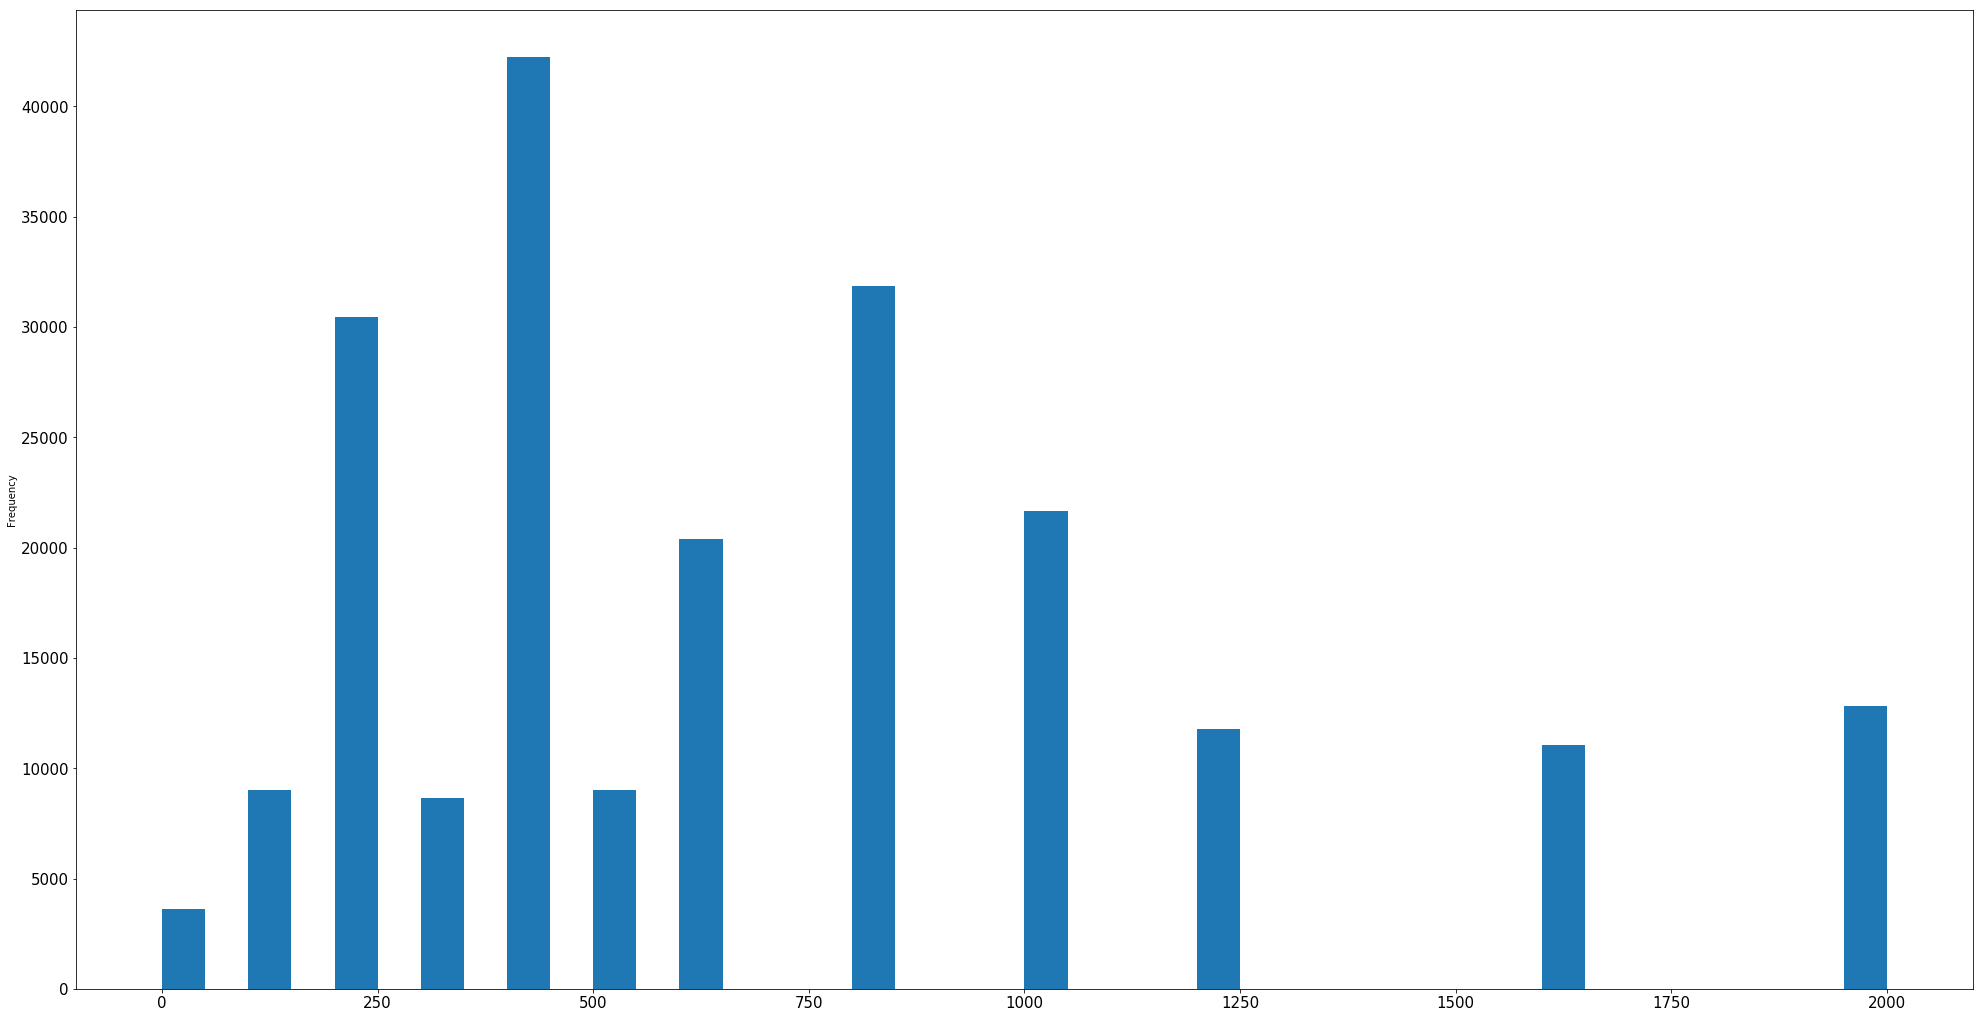

In [46]:
import matplotlib.pyplot as plt   
# The following command allows plots to appear in the jupyter notebook.
%matplotlib inline  
ax = jeopardy.plot( y=' Value',  style = 'o', 
             legend = False, figsize=(34,18), fontsize = 15, kind="hist", bins=40)


#ay = jeopardy.plot(x=' Category', y=' Value',  style = 'o', 
             #legend = False, figsize=(34,18), fontsize = 15, kind="hist")
#ax.set_xlabel("Air Date",fontsize = 20)

#ax.set_ylabel("Dollar Amounts",fontsize = 20);

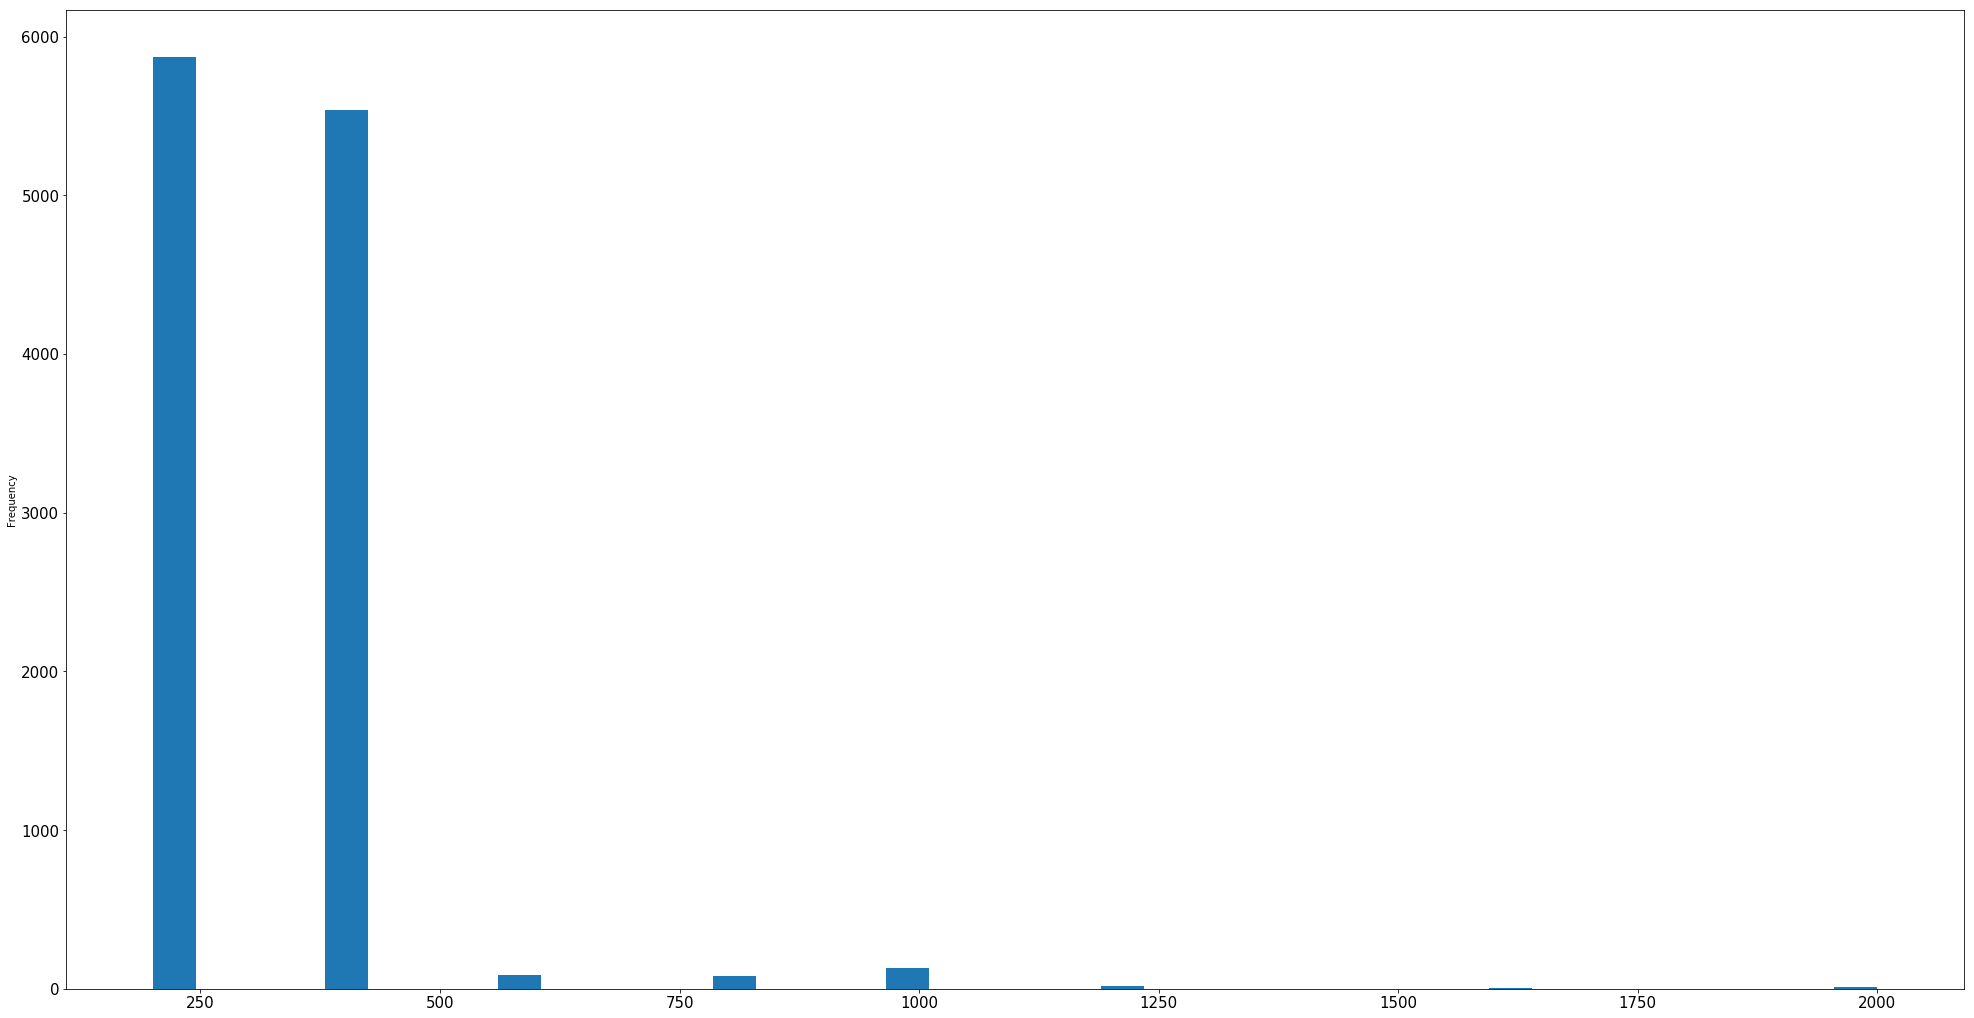

In [45]:
counts = jeopardy[' Value'].value_counts()
farmersonly = jeopardy[(jeopardy[' Value'].isin(counts[counts > 10000].index)) & (jeopardy[' Round'] == "Jeopardy!")]
pd.options.mode.chained_assignment = None
farmersonly[' Air Date'] = pd.to_datetime(farmersonly[' Air Date'], yearfirst= True)
youngfarmersonly = farmersonly[(farmersonly[' Air Date'] >= '01-01-1995') & (farmersonly[' Air Date'] <= '12-31-2000')]

ax = youngfarmersonly.plot( y=' Value',  style = 'o', 
             legend = False, figsize=(34,18), fontsize = 15, kind="hist", bins=40)